### Time Resolved Photoluminescence Modeling

In a TRPL experiment the sample is hitted by a laser pulse of a very short time (picoseconds) which generates a first excess carrier density *n(0)*. This value decays in time due to charge recombination processes happening in the material.
The overall decay of the excess carrier density results in a exponential decay curve that is normally fitted with a multiple exponential. But the main limitation is that lifetime constants are extrapoleted by these fitting curve which do not explain precisely the physical processes which play simultaneously a role in the decay dynamics. 

For these reasons, we want to analyze in details the processes of generation and recombination of charges that happen after excitation to find the best and most precise way to get information on carrier recombination processes.

We start from the continuity equation which describe the number of photogenerated excess carrier in time:

$\frac{\delta(n)}{\delta(t)} = - R_1(z,t) - R_2(z,t)$

* $R_1$ is the recombination constant associated with Shockley Read Hall (SRH) recombination

$R_1 = \frac{(n_0 + n)(p_0 + p) - n_i^2}{(n_0 + n) + (p_0 + p) + 2n_icosh\frac{(E_i - E_t)}{kT}} \sigma \nu_{th} N_t$

* $R_2$ is the recombination rate associated with the band-to-band recombination (bimolecular process)


LLI
$R_2(z, t) = k_2[p(p_0)]$

HLI
$R_2(z, t) = k_2[p^2]$

The Auger recombination is negligible under the normal working condition of solar cells (below an excess carrier density of $10^{17} cm^{−3}$ )

* **Low Level Injection regime: $n=p<<p_0$**

Under low injection level (LLI) conditions, the photocarrier
density *n* is much lower than the equilibrium density of the
majority carriers; $R_1$ can be expressed as a linear function of the
photocarrier density *n(z,t)*. 
Approximation:

$R_1 = k_1n(z,t)$

Where $k_1$ is the SRH recombination frequency(?=constant?)

Approximation of $R_2$:

$R_2 = k_2p_0p$

**Continuity equation at LLI**

$\frac{\delta(n)}{\delta(t)} = -(k_1 + k_2p_0)p$

$k_2p_0$ is non-negligible only if the
absorbing layer is highly doped 
($k1 = 10^7 s^{−1}$ and $k_2 = 10^{−10} \frac{cm^3}{s}, p_0 > 10^{17} cm^{−3}$). 
Therefore, under LLI conditions and low doping concentration, the decay of the photogenerated carriers is mainly controlled by the SRH recombination rate $k_1$

**Continuity equation at HLI**

$\frac{\delta(n)}{\delta(t)} = -(k'_1 + k_2p_0)p - k_2p^2$  

where $k'_1$ 

Approximation of the existance of only deep level traps:

**LLI** : $\frac{\delta(n)}{\delta(t)} = -(k_1 + k_2p_0)p - k_2p^2$ 

**HLI** : $\frac{\delta(n)}{\delta(t)} = -(\frac{k_1}{2} + k_2p_0)p - k_2p^2$ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.stats import skewnorm
from scipy.stats import exponnorm
from customplotting.general import plot_xy, save_fig
from functions import *
from scipy.stats import norm

In [2]:
"""Recycle params for plotting"""
plt.rc('xtick', labelsize = 30)
plt.rc('xtick.major', pad = 3)
plt.rc('ytick', labelsize = 30)
plt.rc('lines', lw = 3.5, markersize = 20.5)
plt.rc('legend', fontsize = 30)
plt.rc('axes', linewidth = 3.5)

In [3]:
# HLI continuity equation: dn/dt with k2, n0 as a constant and k1 as a variable
def photoluminescence_HLI(t, k1):
    def model(n, t):
        k2 = 2e-10
        dndt = -(k2*(n**2) + k1*n)
        return dndt
    n0 = np.tile(np.power(10, 14), 50)
    n = odeint(model, n0, t)
    k2 = 2e-10
    pl_HLI = k2 * (n**2)
    return pl_HLI

In [4]:
# LLI continuity equation: dn/dt with k2, n0 as a constant and k1 as a variable
def photoluminescence_LLI(t, k1):
    def model(n, t):
        k2 = 2e-10
        dndt = -(k2*(n**2) + k1*n)
        return dndt
    n0 = np.tile(np.power(10, 14), 50)
    n = odeint(model, n0, t)
    k2 = 2e-10
    p0 = 1e18
    pl_LLI = k2 * n* p0
    return pl_LLI

In [5]:
# photoluminescence database from k1 from 1e5 to 1e7 and time from 0 to 1000ns
pl_HLI = photoluminescence_HLI(t = np.linspace(0,5000, 5000)*1e-9, k1= np.logspace(6, 7, 50))
pl_HLI

array([[2.00000000e+18, 2.00000000e+18, 2.00000000e+18, ...,
        2.00000000e+18, 2.00000000e+18, 2.00000000e+18],
       [1.99592338e+18, 1.99573130e+18, 1.99552999e+18, ...,
        1.96383213e+18, 1.96211234e+18, 1.96031142e+18],
       [1.99185516e+18, 1.99147179e+18, 1.99107006e+18, ...,
        1.92831909e+18, 1.92494323e+18, 1.92141130e+18],
       ...,
       [8.76470596e+13, 5.42777415e+13, 3.28418780e+13, ...,
        6.04217045e-22, 7.58488348e-24, 7.71297304e-26],
       [8.74718825e+13, 5.41640483e+13, 3.27697812e+13, ...,
        5.93314062e-22, 7.44149317e-24, 7.56021568e-26],
       [8.72970556e+13, 5.40505932e+13, 3.26978426e+13, ...,
        5.82607822e-22, 7.30081362e-24, 7.41048372e-26]])

In [6]:
pl_HLI.shape

(5000, 50)

In [7]:
#x values of time
t = np.linspace(0,5000, 5000)*1e-9
t

array([0.00000000e+00, 1.00020004e-09, 2.00040008e-09, ...,
       4.99799960e-06, 4.99899980e-06, 5.00000000e-06])

In [8]:


#weighted sum of photoluminescence data
pl_HLI_sum = pl_HLI.sum(axis=0)
pl_HLI_sum.size

50

In [9]:

#weighted average og the photoluminescence data
pl_HLI_avg = np.average(pl_HLI, weights=pl_HLI_sum, axis=-1)
pl_HLI_avg.size

5000

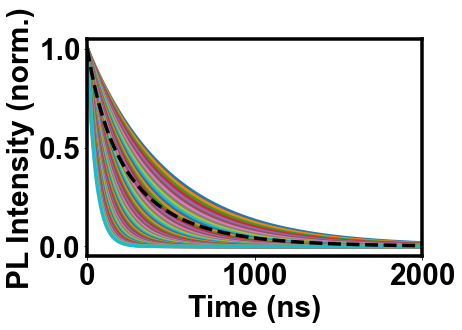

In [10]:

#plot of exponential decay of photoluminescence
plt.plot(t*1e9, pl_HLI/np.max(pl_HLI))
plt.plot(t*1e9, pl_HLI_avg/np.max(pl_HLI_avg),'k--', label="Average")
plt.xlabel('Time (ns)', fontsize=30, fontweight='bold')
plt.ylabel('PL Intensity (norm.)', fontsize= 30, fontweight='bold')
plt.xlim(0, 2000)
plt.show()

In [12]:
#streched exponential fitting of the average PL exponential decay
stretched_exp = stretch_exp_fit(pl_HLI_avg/np.max(pl_HLI_avg), t)
print("tau_c (ns) = "+str(stretched_exp[0]*1e9))
print("Beta = "+str(stretched_exp[1]))
print("avg. tau (ns) = "+str(stretched_exp[3]*1e9))

tau_c (ns) = 239.7944147194978
Beta = 0.8125376594829755
avg. tau (ns) = 268.7319812072759


In [14]:
#double exponential fitting of the average PL exponential decay
double_exp = double_exp_fit(pl_HLI_avg/np.max(pl_HLI_avg), t)
print("tau1 (ns) = "+str(double_exp[0]*1e9))
print("a1 = "+str(double_exp[1]))
print("tau2 (ns) = "+str(double_exp[2]*1e9))
print("a2 = "+str(double_exp[3]))
print("avg. tau (ns) = "+str(double_exp[4]*1e9))

tau1 (ns) = 161.61536880683425
a1 = 0.5018240796899093
tau2 (ns) = 414.86251183912856
a2 = 0.47231751487995466
avg. tau (ns) = 284.4035362705974


In [15]:
#triple exponential fitting of the average PL exponential decay
#triple_exp = triple_exp_fit(pl_HLI_avg/np.max(pl_HLI_avg), t)
#print("tau1 (ns) = "+str(triple_exp[0]*1e9))
#print("a1 = "+str(triple_exp[1]))
#print("tau2 (ns) = "+str(triple_exp[2]*1e9))
#print("a2 = "+str(triple_exp[3]))
#print("tau3 (ns) = "+str(triple_exp[4]*1e9))
#print("a3 (ns) = "+str(triple_exp[5]))
#print("avg. tau (ns) = "+str(triple_exp[6]*1e9))

In [17]:
#single exponential fitting of the average PL exponential decay
single_exp = single_exp_fit(pl_HLI_avg/np.max(pl_HLI_avg), t)
print("tau (ns) = "+str(single_exp[0]*1e9))
print("a = "+str(single_exp[1]))
print("avg. tau (ns) = "+str(single_exp[2]*1e9))

tau (ns) = 345.4939274470157
a = 0.8098006881730165
avg. tau (ns) = 345.49392744701566


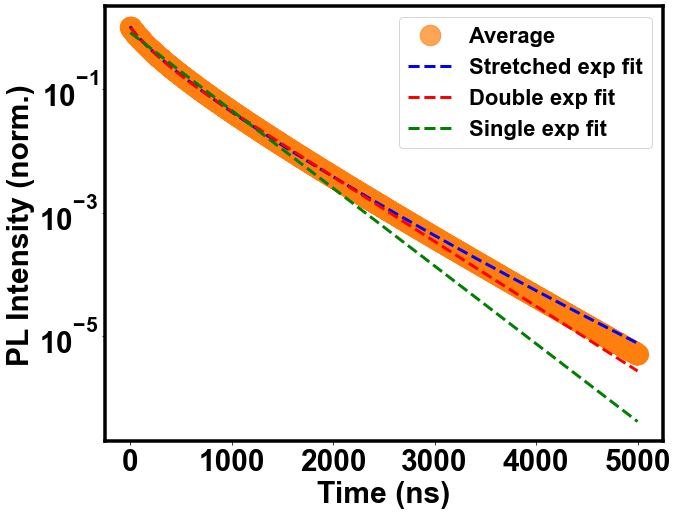

In [19]:
# plot fitting functions of the average PL exponential decay
plt.figure(figsize=(10,8))
plt.plot(t*1e9, pl_HLI_avg/np.max(pl_HLI_avg),'C1o', alpha=0.7,label="Average")
plt.plot(t*1e9, stretched_exp[4], 'b--', lw = 3, label="Stretched exp fit")
plt.plot(t*1e9, double_exp[5], 'r--', lw = 3, label="Double exp fit")
#plt.plot(t*1e9, triple_exp[7], 'c--', lw = 3, label="triple exp fit")
plt.plot(t*1e9, single_exp[3], 'g--', lw = 3, label="Single exp fit")
plt.yscale('log')
#plt.xlim(0, 5000)
plt.xlabel("Time (ns)", fontsize=30,fontweight='bold')
plt.ylabel("PL Intensity (norm.)", fontsize=30, fontweight='bold')
plt.legend(fontsize=22)




### Calculation of theoretical tau  
$I = I_0e^{(\frac{-t}{\tau})}$ when t = $\tau$ and $I = \frac{I_0}{e}$

In [20]:
PL_e_HLI = np.max(pl_HLI, axis=0)/np.e
PL_e_HLI.size

50

In [21]:
#function to calulate the index of the PL/e values in the "pl" database by looking at the nearest neighbor of the "PL_e_values" inside "pl"
def find_idx(array, value):
    return (np.abs(array - value)).argmin()

In [22]:
# index of PL data calculated considering each array inside the array of pl singularly
time_PL_HLI = np.array([])
for ix, i in enumerate(PL_e_HLI):
    b = find_idx(pl_HLI[:, ix], i)
    time_PL_HLI = np.append(time_PL_HLI, b)
time_PL_HLI

array([492., 470., 449., 428., 409., 390., 373., 356., 340., 324., 309.,
       295., 282., 269., 257., 245., 234., 223., 213., 203., 194., 185.,
       177., 169., 161., 154., 147., 140., 134., 127., 122., 116., 111.,
       106., 101.,  96.,  92.,  88.,  84.,  80.,  76.,  73.,  69.,  66.,
        63.,  60.,  57.,  55.,  52.,  50.])

In [23]:
# array of lifetime at which PL=PL0/e
lifetime_HLI = np.array([])
for i in time_PL_HLI:
    lifetime_HLI = np.append(lifetime_HLI, t[int(i)]) 
lifetime_HLI*1e9

array([492.09841968, 470.0940188 , 449.08981796, 428.08561712,
       409.08181636, 390.0780156 , 373.07461492, 356.07121424,
       340.0680136 , 324.06481296, 309.06181236, 295.0590118 ,
       282.05641128, 269.05381076, 257.05141028, 245.0490098 ,
       234.04680936, 223.04460892, 213.04260852, 203.04060812,
       194.03880776, 185.0370074 , 177.03540708, 169.03380676,
       161.03220644, 154.03080616, 147.02940588, 140.0280056 ,
       134.02680536, 127.02540508, 122.02440488, 116.02320464,
       111.02220444, 106.02120424, 101.02020404,  96.01920384,
        92.01840368,  88.01760352,  84.01680336,  80.0160032 ,
        76.01520304,  73.01460292,  69.01380276,  66.01320264,
        63.01260252,  60.0120024 ,  57.01140228,  55.0110022 ,
        52.01040208,  50.010002  ])

In [24]:
avg_lifetime_HLI = np.average(lifetime_HLI, weights=pl_HLI_sum, axis=-1)
avg_lifetime_HLI*1e9

276.62487116492144

(0.0, 500.0)

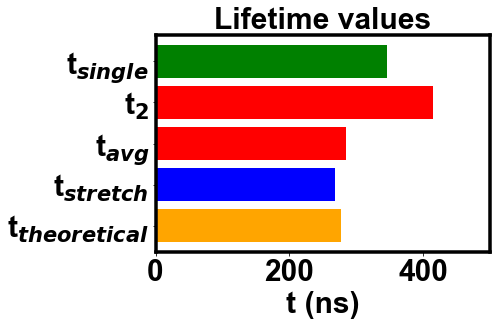

In [27]:
#plot of different tau values, from mathematical calculation (reference) and fitting functions
plt.figure()
plt.title("Lifetime values", fontsize=30, fontweight="bold")
plt.barh("t$_{theoretical}$", avg_lifetime_HLI*1e9, color='orange')
plt.barh("t$_{stretch}$", stretched_exp[3]*1e9, color = 'blue')
plt.barh("t$_{avg}$", double_exp[4]*1e9, color= 'red')
plt.barh("t$_{2}$", double_exp[2]*1e9, color='red')
plt.barh("t$_{single}$", single_exp[2]*1e9, color= 'green')
plt.xlabel("t (ns)", fontsize =30 , fontweight='bold')
plt.xlim(0, 500)
#plt.barh("Triple Exp $\tau^{3}$", triple_exp[4]*1e9)
#plt.barh("Triple Exp $\tau^{avg}$", triple_exp[6]*1e9)

In [28]:
surf_lifetime_avg = calculate_surface_lifetime(avg_lifetime_HLI*1e9)
SRV_avg = calculate_srv (surf_lifetime_avg)
print("SRV1=0 theoretical value = " +str(SRV_avg[0]) +' cm/s')
print("SRV1=SRV2 theoretical value = " +str(SRV_avg[1]) +' cm/s' )

surf_lifetime_stretch = calculate_surface_lifetime(stretched_exp[3]*1e9)
SRV_avg_stretch = calculate_srv (surf_lifetime_stretch)
print("SRV1=0 from stretched exp fitting = " +str(SRV_avg_stretch[0]) +' cm/s')
print("SRV1=SRV2 from stretched exp fitting = " +str(SRV_avg_stretch[1]) +' cm/s' )

surf_lifetime_tau_2 = calculate_surface_lifetime(double_exp[2]*1e9)
SRV_avg_tau2 = calculate_srv (surf_lifetime_tau_2)
print("SRV1=0 from tau 2 of biexp fitting = " +str(SRV_avg_tau2[0]) +' cm/s')
print("SRV1=SRV2 from tau 2 of biexp fitting = " +str(SRV_avg_tau2[1]) +' cm/s' )

surf_lifetime_bi = calculate_surface_lifetime(double_exp[4]*1e9)
SRV_avg_bi = calculate_srv (surf_lifetime_bi)
print("SRV1=0 from tau avg biexp fitting = " +str(SRV_avg_bi[0]) +' cm/s')
print("SRV1=SRV2 from tau avg biexp fitting = " +str(SRV_avg_bi[1]) +' cm/s' )

SRV1=0 theoretical value = 139.95207693965048 cm/s
SRV1=SRV2 theoretical value = 69.84398574889792 cm/s
SRV1=0 from stretched exp fitting = 144.22087536107543 cm/s
SRV1=SRV2 from stretched exp fitting = 71.97021446714353 cm/s
SRV1=0 from tau 2 of biexp fitting = 91.56826783696614 cm/s
SRV1=SRV2 from tau 2 of biexp fitting = 45.727567056730955 cm/s
SRV1=0 from tau avg biexp fitting = 135.97746519729242 cm/s
SRV1=SRV2 from tau avg biexp fitting = 67.86406723260242 cm/s


Text(0.5, 0, '$SRV (cm/s)$')

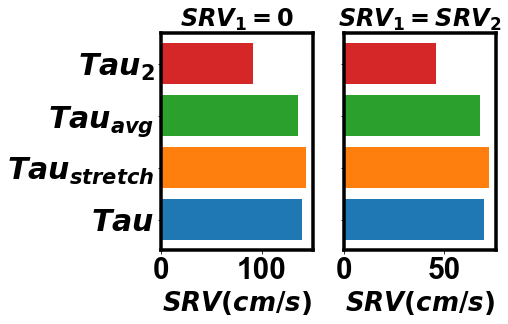

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.barh("Theoretical", SRV_avg[0])
ax1.barh("Stretched Exp", SRV_avg_stretch[0])
ax1.barh("$Tau_{avg}$", SRV_avg_bi[0])
ax1.barh("$Tau_{2}$", SRV_avg_tau2[0])
ax1.set_title("$SRV_{1} = 0$")
ax1.set_xlabel("$SRV (cm/s)$", fontsize= 26)

ax2.barh("$Tau$",SRV_avg[1])
ax2.barh("$Tau_{stretch}$", SRV_avg_stretch[1])
ax2.barh("$Tau_{avg}$", SRV_avg_bi[1])
ax2.barh("$Tau_{2}$",SRV_avg_tau2[1])
ax2.set_title("$SRV_{1} = SRV_{2}$")
ax2.set_xlabel("$SRV (cm/s)$", fontsize=26)

# Low Level Injection 

In [30]:
#creation of LLI PL decay curves and average decay curve

# photoluminescence database from k1 from 1e5 to 1e7 and time from 0 to 1000ns
pl_LLI = photoluminescence_LLI(t = np.linspace(0,5000, 5000)*1e-9, k1= np.logspace(6, 7, 50))
pl_LLI

#weighted sum of photoluminescence data
pl_LLI_sum = pl_LLI.sum(axis=0)
pl_LLI_sum

#weighted average og the photoluminescence data
pl_LLI_avg = np.average(pl_LLI, weights=pl_LLI_sum, axis=-1)
pl_LLI_avg

array([2.00000000e+22, 1.99487909e+22, 1.98977849e+22, ...,
       2.45420283e+19, 2.45142953e+19, 2.44865941e+19])

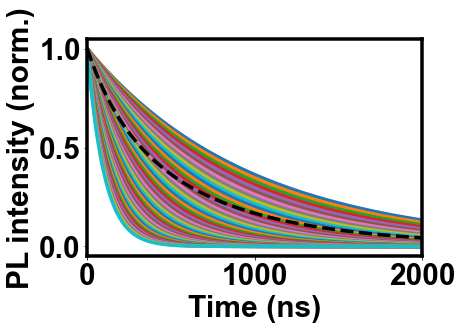

In [31]:
#plot of exponential decay of photoluminescence
plt.plot(t*1e9, pl_LLI/np.max(pl_LLI))
plt.plot(t*1e9, pl_LLI_avg/np.max(pl_LLI_avg),'k--', label="Average")
plt.xlabel('Time (ns)', fontsize =30, fontweight ='bold')
plt.ylabel('PL intensity (norm.)', fontsize= 30, fontweight ='bold')
plt.xlim(0, 2000)
plt.show()

In [32]:
#streched exponential fitting of the average PL exponential decay
stretched_exp = stretch_exp_fit(pl_LLI_avg/np.max(pl_LLI_avg), t)
print("tau_c (ns) = "+str(stretched_exp[0]*1e9))
print("Beta = "+str(stretched_exp[1]))
print("avg. tau (ns) = "+str(stretched_exp[3]*1e9))

/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:39: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:39: RuntimeWarning: overflow encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


tau_c (ns) = 477.4796505590864
Beta = 0.8087369058010732
avg. tau (ns) = 536.8466937228684


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:24: RuntimeWarning: divide by zero encountered in double_scalars
  return a * np.exp(-((1.0 / tc) * t) ** beta)
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:24: RuntimeWarning: invalid value encountered in multiply
  return a * np.exp(-((1.0 / tc) * t) ** beta)


In [33]:
#double exponential fitting of the average PL exponential decay
double_exp = double_exp_fit(pl_LLI_avg/np.max(pl_LLI_avg), t)
print("tau1 (ns) = "+str(double_exp[0]*1e9))
print("a1 = "+str(double_exp[1]))
print("tau2 (ns) = "+str(double_exp[2]*1e9))
print("a2 = "+str(double_exp[3]))
print("avg. tau (ns) = "+str(double_exp[4]*1e9))

tau1 (ns) = 304.753386864641
a1 = 0.4737010687308219
tau2 (ns) = 813.8996662957595
a2 = 0.5048167774513269
avg. tau (ns) = 567.4216509505525


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:62: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t)))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:62: RuntimeWarning: invalid value encountered in multiply
  return (a * np.exp(-((1.0 / tau)*t)))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:82: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


In [34]:
#triple exponential fitting of the average PL exponential decay
#triple_exp = triple_exp_fit(pl_LLI_avg/np.max(pl_LLI_avg), t)
#print("tau1 (ns) = "+str(triple_exp[0]*1e9))
#print("a1 = "+str(triple_exp[1]))
#print("tau2 (ns) = "+str(triple_exp[2]*1e9))
#print("a2 = "+str(triple_exp[3]))
#print("tau3 (ns) = "+str(triple_exp[4]*1e9))
#print("a3 (ns) = "+str(triple_exp[5]))
#print("avg. tau (ns) = "+str(triple_exp[6]*1e9))

In [35]:
#single exponential fitting of the average PL exponential decay
single_exp = single_exp_fit(pl_LLI_avg/np.max(pl_LLI_avg), t)
print("tau (ns) = "+str(single_exp[0]*1e9))
print("a = "+str(single_exp[1]))
print("avg. tau (ns) = "+str(single_exp[2]*1e9))

tau (ns) = 681.3632194605271
a = 0.8186464568845693
avg. tau (ns) = 681.3632194605273


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:107: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t)))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:107: RuntimeWarning: invalid value encountered in multiply
  return (a * np.exp(-((1.0 / tau)*t)))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:121: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


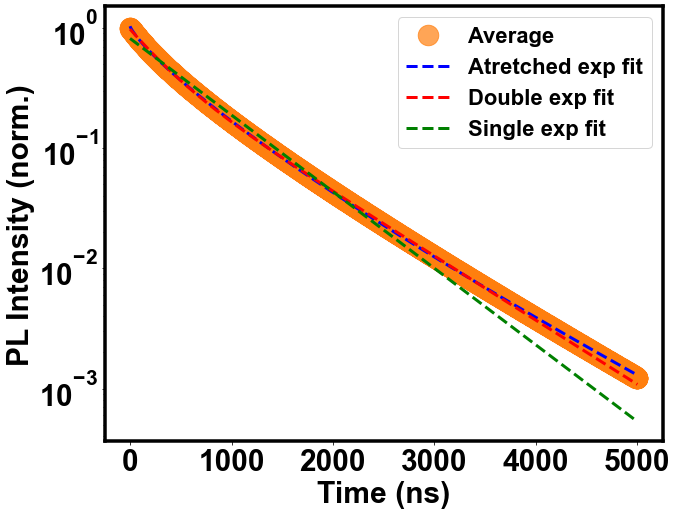

In [36]:
# plot fitting functions of the average PL exponential decay
plt.figure(figsize=(10,8))
plt.plot(t*1e9, pl_LLI_avg/np.max(pl_LLI_avg),'C1o', alpha=0.7,label="Average")
plt.plot(t*1e9, stretched_exp[4], 'b--', lw = 3, label="Atretched exp fit")
plt.plot(t*1e9, double_exp[5], 'r--', lw = 3, label="Double exp fit")
#plt.plot(t*1e9, triple_exp[7], 'c--', lw = 3, label="triple exp fit")
plt.plot(t*1e9, single_exp[3], 'g--', lw = 3, label="Single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30, fontweight ='bold')
plt.ylabel("PL Intensity (norm.)", fontsize=30, fontweight ='bold')
plt.legend(fontsize=22)

In [37]:
#Mathematical derivation of theoretical average lifetime from weighted average of each time at which I = I0/e

#photoluminescence maximum from LLI regime divided by e
PL_e_LLI = np.max(pl_LLI, axis=0)/np.e
PL_e_LLI.size

# index of LLI PL data calculated considering each array inside the array of pl singularly
time_PL_LLI = np.array([])
for ix, i in enumerate(PL_e_LLI):
    b = find_idx(pl_LLI[:, ix], i)
    time_PL_LLI = np.append(time_PL_LLI, b)
time_PL_LLI

# array of lifetime at which PL=PL0/e at LLI
lifetime_LLI = np.array([])
for i in time_PL_LLI:
    lifetime_LLI = np.append(lifetime_LLI, t[int(i)]) 
lifetime_LLI*1e9

#weighted average of calculate lifetimes with pl_sum weights
avg_lifetime_LLI = np.average(lifetime_LLI, weights=pl_LLI_sum, axis=-1)
avg_lifetime_LLI*1e9

554.4906538897352

(0.0, 1000.0)

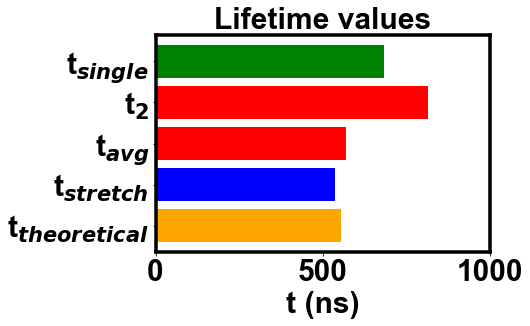

In [38]:

#plot of different tau values, from mathematical calculation (reference) and fitting functions
plt.figure()
plt.title("Lifetime values", fontsize=30, fontweight="bold")
plt.barh("t$_{theoretical}$", avg_lifetime_LLI*1e9, color='orange')
plt.barh("t$_{stretch}$", stretched_exp[3]*1e9, color = 'blue')
plt.barh("t$_{avg}$", double_exp[4]*1e9, color= 'red')
plt.barh("t$_{2}$", double_exp[2]*1e9, color='red')
plt.barh("t$_{single}$", single_exp[2]*1e9, color= 'green')
plt.xlabel("t (ns)", fontsize =30 , fontweight='bold')
plt.xlim(0, 1000)
#plt.barh("Triple Exp $\tau^{3}$", triple_exp[4]*1e9)
#plt.barh("Triple Exp $\tau^{avg}$", triple_exp[6]*1e9)

SRV1=0 theoretical value = 67.21956752475667 cm/s
SRV1=SRV2 theoretical value = 33.57929033653632 cm/s
SRV1=0 from stretched exp fitting = 69.5963047620969 cm/s
SRV1=SRV2 from stretched exp fitting = 34.76546551964822 cm/s
SRV1=0 from tau 2 of biexp fitting = 44.18123931033605 cm/s
SRV1=SRV2 from tau 2 of biexp fitting = 22.07744237908588 cm/s
SRV1=0 from tau avg biexp fitting = 65.57167057837054 cm/s
SRV1=SRV2 from tau avg biexp fitting = 32.75681799269498 cm/s


Text(0.5, 0, '$SRV (cm/s)$')

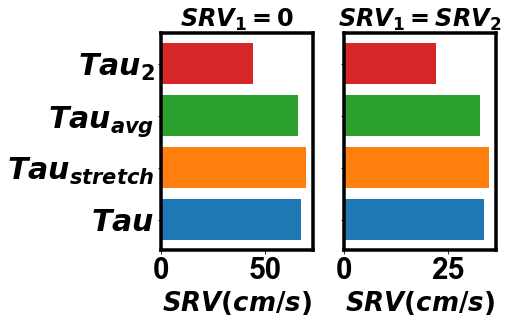

In [39]:


surf_lifetime_avg = calculate_surface_lifetime(avg_lifetime_LLI*1e9)
SRV_avg = calculate_srv (surf_lifetime_avg)
print("SRV1=0 theoretical value = " +str(SRV_avg[0]) +' cm/s')
print("SRV1=SRV2 theoretical value = " +str(SRV_avg[1]) +' cm/s' )

surf_lifetime_stretch = calculate_surface_lifetime(stretched_exp[3]*1e9)
SRV_avg_stretch = calculate_srv (surf_lifetime_stretch)
print("SRV1=0 from stretched exp fitting = " +str(SRV_avg_stretch[0]) +' cm/s')
print("SRV1=SRV2 from stretched exp fitting = " +str(SRV_avg_stretch[1]) +' cm/s' )

surf_lifetime_tau_2 = calculate_surface_lifetime(double_exp[2]*1e9)
SRV_avg_tau2 = calculate_srv (surf_lifetime_tau_2)
print("SRV1=0 from tau 2 of biexp fitting = " +str(SRV_avg_tau2[0]) +' cm/s')
print("SRV1=SRV2 from tau 2 of biexp fitting = " +str(SRV_avg_tau2[1]) +' cm/s' )

surf_lifetime_bi = calculate_surface_lifetime(double_exp[4]*1e9)
SRV_avg_bi = calculate_srv (surf_lifetime_bi)
print("SRV1=0 from tau avg biexp fitting = " +str(SRV_avg_bi[0]) +' cm/s')
print("SRV1=SRV2 from tau avg biexp fitting = " +str(SRV_avg_bi[1]) +' cm/s' )

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.barh("Theoretical", SRV_avg[0])
ax1.barh("Stretched Exp", SRV_avg_stretch[0])
ax1.barh("$Tau_{avg}$", SRV_avg_bi[0])
ax1.barh("$Tau_{2}$", SRV_avg_tau2[0])
ax1.set_title("$SRV_{1} = 0$")
ax1.set_xlabel("$SRV (cm/s)$", fontsize= 26)

ax2.barh("$Tau$",SRV_avg[1])
ax2.barh("$Tau_{stretch}$", SRV_avg_stretch[1])
ax2.barh("$Tau_{avg}$", SRV_avg_bi[1])
ax2.barh("$Tau_{2}$",SRV_avg_tau2[1])
ax2.set_title("$SRV_{1} = SRV_{2}$")
ax2.set_xlabel("$SRV (cm/s)$", fontsize=26)

## Skew-Normal Distribution of k1 with a = 10


The Skew-Normal distribution is an extension of the normal (Gaussian) probability distribution, allowing for the presence of skewness.
The component $\alpha$ is what gives the distribution its "skewness" which regulates the shape of the density function. 

* when $\alpha=0$, the skewness vanishes, and we obtain the standard Normal density
* when $\alpha$ increases in absolute value , the skewness of the distribution increases.
* when  $\alpha\to\infty$ the density converges to the so-called half-normal (or folded normal) density function
* when the sign of $\alpha$ changes, the density is reflected on the opposite side of the vertical axis.

<a href="{http://azzalini.stat.unipd.it/SN/Intro/intro.html}">{Ref}</a>

For a random variable $x$ which has a standard skew normal distribution with skewness parameter $\alpha$, its probability density function is given by:


$f(x) = 2 \phi(x) \Phi(\alpha x)$

with :

$\phi(x)={\frac {1}{\sqrt {2\pi }}}\;e^{-x^{2}/2}$
$\qquad \Phi(\alpha x) = \int_{-\infty}^{\alpha x}\phi(t) dt$

Simple continuity equation considering just the radiative (k2) and defect-assisted non-radiative recombination (k1)
* k1 = skewed distribution with maximum at 1e6 ns and a size of 50 data points
* k2 = 2e-10 cm^3 s^-1
* n0 = 1e14
* t = 0 to 1000 ns

In [40]:
# skewed gaussian distribution of k1 values
skew = skewnorm.rvs(a = 10, loc = 1e6, scale=9e6, size=50)

In [181]:
skew 

array([ 9490786.30513777,  7536630.11982634, 16454346.60930195,
       12547720.36848101,  3905472.07319704,  3529527.88225739,
        1266243.72953522,  6006013.55006531,  4602896.37435109,
        7964610.83358873, 13970152.25853891,  7357512.91416742,
        1182815.07376768, 11058965.25302741, 11441069.92801695,
        8752435.01119279,  4939621.14498479, 10144841.23073811,
        4309587.32480473,  8056163.80990646,  5918150.92607533,
        3003214.06507928, 11215807.32962731,  2407773.19636073,
         745245.40071062,  8106849.65451734,  4678521.29405187,
       18037650.95905221, 15634208.49448247,  3218300.79977616,
       11403450.57828473,  1680981.61896775,  3299021.97267475,
       14074921.58581428, 10855144.85579374,  8830888.35232471,
        9600350.04248585,  6832395.47780042,  7606054.25627072,
       21891340.96296946,  4774627.49634307,  9914665.74785788,
        1179542.21358483, 14082925.73768848,  2586264.61483294,
        7239004.41180339, 14384901.50760

In [41]:
skew = np.array([ 9490786.30513777,  7536630.11982634, 16454346.60930195,
       12547720.36848101,  3905472.07319704,  3529527.88225739,
        1266243.72953522,  6006013.55006531,  4602896.37435109,
        7964610.83358873, 13970152.25853891,  7357512.91416742,
        1182815.07376768, 11058965.25302741, 11441069.92801695,
        8752435.01119279,  4939621.14498479, 10144841.23073811,
        4309587.32480473,  8056163.80990646,  5918150.92607533,
        3003214.06507928, 11215807.32962731,  2407773.19636073,
         745245.40071062,  8106849.65451734,  4678521.29405187,
       18037650.95905221, 15634208.49448247,  3218300.79977616,
       11403450.57828473,  1680981.61896775,  3299021.97267475,
       14074921.58581428, 10855144.85579374,  8830888.35232471,
        9600350.04248585,  6832395.47780042,  7606054.25627072,
       21891340.96296946,  4774627.49634307,  9914665.74785788,
        1179542.21358483, 14082925.73768848,  2586264.61483294,
        7239004.41180339, 14384901.50760069,  6845284.87325528,
        5608360.70212701,  4814080.61690508])

Text(0, 0.5, 'Counts')

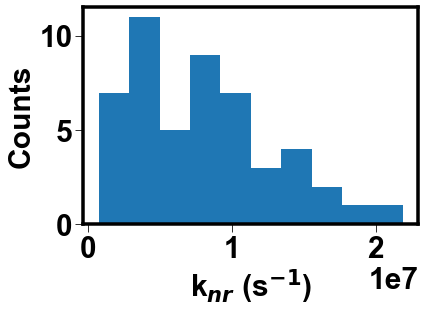

In [42]:
plt.figure()
plt.tick_params(length=8)
plt.hist(skew)
plt.xlabel("k$_{nr}$ (s$^{-1}$)", fontsize =30, fontweight ='bold')
#plt.xscale("log")
plt.ylabel('Counts', fontsize =30, fontweight ='bold')

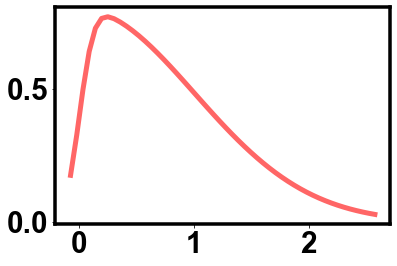

In [43]:
x = np.linspace(skewnorm.ppf(0.01, 10), skewnorm.ppf(0.99, 10), 50)
plt.plot(x, skewnorm.pdf(x, 10), 'r-', lw=5, alpha=0.6, label='skewnorm pdf')

Text(0, 0.5, 'Counts')

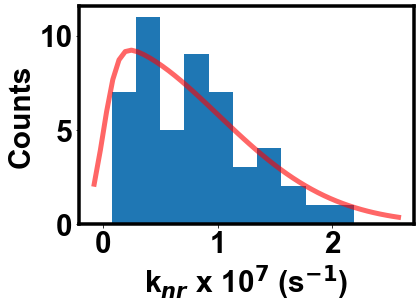

In [44]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, skewnorm.pdf(x, 10)*12, 'r-', lw=5, alpha=0.6, label='skewnorm pdf')
ax.hist(skew*1e-7)
plt.xlabel("k$_{nr}$ x 10$^{7}$ (s$^{-1}$)", fontsize =30, fontweight ='bold')
#plt.xscale("log")
plt.ylabel('Counts', fontsize =30, fontweight ='bold')

### SN of k1 in HLI regime

In [45]:
# PL decay curves for each k1 value 
pl_skew = photoluminescence_HLI(k1= skew, t=np.linspace(0,5000, 5000)*1e-9)
pl_skew

# weight of each decay curve
skew_sum = pl_skew.sum(axis=0)
skew_sum.size


# weighted average curve which is most likely the one we end up seeing as overall decay
pl_skew_avg = np.average(pl_skew, weights=skew_sum, axis=-1)
pl_skew_avg.size

5000

<function matplotlib.pyplot.show(close=None, block=None)>

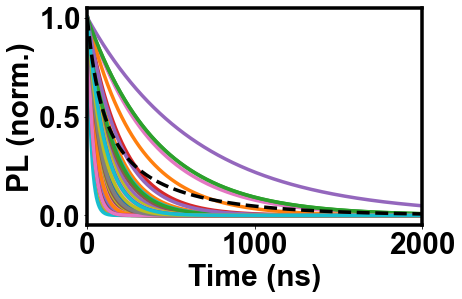

In [46]:
#plot of all exponetial decay for each k1 and average curve
plt.plot(t*1e9, pl_skew/np.max(pl_skew))
plt.plot(t*1e9, pl_skew_avg/np.max(pl_skew_avg),'k--', label="Average")
plt.xlabel('Time (ns)', fontsize =30, fontweight ='bold')
plt.ylabel('PL (norm.)', fontsize =30, fontweight ='bold')
plt.xlim(0, 2000)
plt.show

In [50]:
stretched_exp_skew = stretch_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau_c (ns) = "+str(stretched_exp_skew[0]*1e9))
print("Beta = "+str(stretched_exp_skew[1]))
print("avg. tau (ns) = "+str(stretched_exp_skew[3]*1e9))

tau_c (ns) = 170.41936870187018
Beta = 0.6496376664156582
avg. tau (ns) = 232.9839747756473


In [51]:
double_exp_skew = double_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(double_exp_skew[0]*1e9))
print("a1 = "+str(double_exp_skew[1]))
print("tau2 (ns) = "+str(double_exp_skew[2]*1e9))
print("a2 = "+str(double_exp_skew[3]))
print("avg. tau (ns) = "+str(double_exp_skew[4]*1e9))

tau1 (ns) = 125.49842007701196
a1 = 0.6152054948831454
tau2 (ns) = 541.2519256205297
a2 = 0.3081141299790437
avg. tau (ns) = 264.2364325668885


In [52]:
#triple_exp_skew = triple_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
#print("tau1 (ns) = "+str(triple_exp_skew[0]*1e9))
#print("a1 = "+str(triple_exp_skew[1]))
#print("tau2 (ns) = "+str(triple_exp_skew[2]*1e9))
#print("a2 = "+str(triple_exp_skew[3]))
#print("tau3 (ns) = "+str(triple_exp_skew[4]*1e9))
#print("a3 (ns) = "+str(triple_exp_skew[5]))
#print("avg. tau (ns) = "+str(triple_exp_skew[6]*1e9))

In [54]:
single_exp_skew = single_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau (ns) = "+str(single_exp_skew[0]*1e9))
print("a = "+str(single_exp_skew[1]))
print("avg. tau (ns) = "+str(single_exp_skew[2]*1e9))

tau (ns) = 425.9713356990069
a = 0.5927357550312333
avg. tau (ns) = 425.9713356990069


Text(0, 0.5, 'Log PL (norm.)')

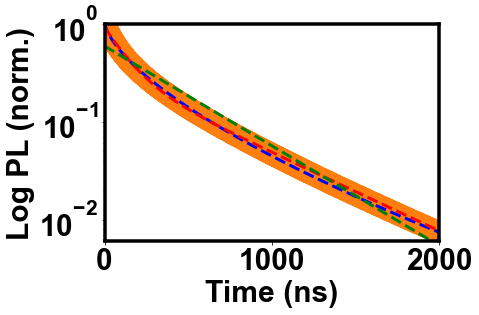

In [55]:
# plot average curve and multiple exponential fitting curves
#plt.figure(figsize=(10,8))
plt.plot(t*1e9, pl_skew_avg/np.max(pl_skew_avg),'C1o', alpha=0.7,label="Average curve")
plt.plot(t*1e9, stretched_exp_skew[4], 'b--', lw = 3, label="Stretched exp. fit")
plt.plot(t*1e9, double_exp_skew[5], 'r--', lw = 3, label="Double exp. fit")
#plt.plot(t*1e9, triple_exp_skew[7], 'c--', lw = 3, label="triple exp fit")
plt.plot(t*1e9, single_exp_skew[3], 'g--', lw = 3, label="Single exp. fit")
plt.yscale('log')
plt.xlim(0, 2000)
plt.ylim(0.006, 1)
plt.xlabel("Time (ns)", fontsize =30, fontweight ='bold')
plt.ylabel("Log PL (norm.)", fontsize =30, fontweight ='bold')
#plt.legend(fontsize=25)

In [56]:
#Mathematical deriation of lifetime from average curve knowing at $\tau$ : $I = \frac{I_0}{e}$

#photoluminescence maximum divided by e
PL_e_skew = np.max(pl_skew, axis=0)/np.e
PL_e_skew.size

# index of PL data calculated considering each array inside the array of pl singularly
time_skew_PL_e = np.array([])
for ix, i in enumerate(PL_e_skew):
    b = find_idx(pl_skew[ix, :], i)
    time_skew_PL_e = np.append(time_skew_PL_e, b)
time_skew_PL_e

# array of lifetime at which PL=PL0/e
lifetime_skew = np.array([])
for i in time_skew_PL_e:
    lifetime_skew = np.append(lifetime_skew, t[int(i)]) 
lifetime_skew*1e9

# index of LLI PL data calculated considering each array inside the array of pl singularly
time_skew_PL_e = np.array([])
for ix, i in enumerate(PL_e_skew):
    b = find_idx(pl_skew[:, ix], i)
    time_skew_PL_e = np.append(time_skew_PL_e, b)
time_skew_PL_e

# array of lifetime at which PL=PL0/e
lifetime_skew = np.array([])
for i in time_skew_PL_e:
    lifetime_skew = np.append(lifetime_skew, t[int(i)]) 
lifetime_skew*1e9


lifetime_skew_avg = np.average(lifetime_skew, weights= skew_sum, axis=-1)
lifetime_skew_avg*1e9

243.40681981502144

(0.0, 600.0)

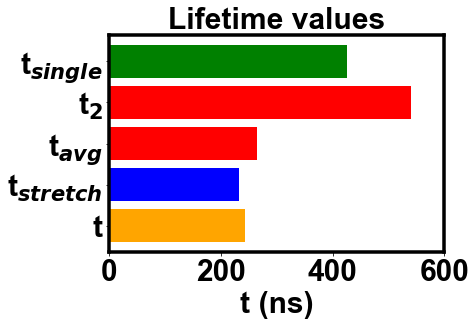

In [57]:
#plot of different tau values, from mathematical calculation (reference) and fitting functions
plt.figure()
plt.title("Lifetime values", fontsize=30, fontweight="bold")
plt.barh("t", lifetime_skew_avg*1e9, color='orange')
plt.barh("t$_{stretch}$", stretched_exp_skew[3]*1e9, color = 'blue')
plt.barh("t$_{avg}$", double_exp_skew[4]*1e9, color= 'red')
plt.barh("t$_{2}$", double_exp_skew[2]*1e9, color='red')
plt.barh("t$_{single}$", single_exp_skew[2]*1e9, color= 'green')
plt.xlabel("t (ns)", fontsize =30 , fontweight='bold')
plt.xlim(0, 600)
#plt.xlim(0,400, 20)

SRV1=0 theoretical value = 159.79254185334526 cm/s
SRV1=SRV2 theoretical value = 79.7241690928162 cm/s
SRV1=0 from stretched exp fitting = 167.18760042579723 cm/s
SRV1=SRV2 from stretched exp fitting = 83.40541911449348 cm/s
SRV1=0 from tau 2 of biexp fitting = 68.988362307024 cm/s
SRV1=SRV2 from tau 2 of biexp fitting = 34.4620625914665 cm/s
SRV1=0 from tau avg biexp fitting = 146.76655646342186 cm/s
SRV1=SRV2 from tau avg biexp fitting = 73.23806607900944 cm/s


Text(0.5, 0, 'SRV (cm/s)')

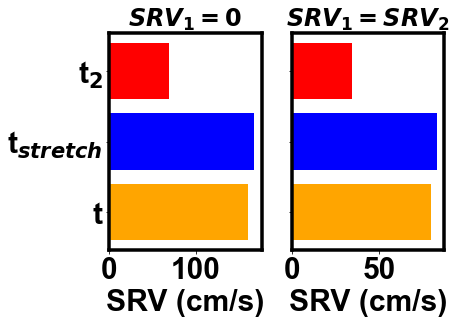

In [58]:
surf_lifetime_avg = calculate_surface_lifetime(lifetime_skew_avg*1e9)
SRV_avg = calculate_srv (surf_lifetime_avg)
print("SRV1=0 theoretical value = " +str(SRV_avg[0]) +' cm/s')
print("SRV1=SRV2 theoretical value = " +str(SRV_avg[1]) +' cm/s' )

surf_lifetime_stretch = calculate_surface_lifetime(stretched_exp_skew[3]*1e9)
SRV_avg_stretch = calculate_srv (surf_lifetime_stretch)
print("SRV1=0 from stretched exp fitting = " +str(SRV_avg_stretch[0]) +' cm/s')
print("SRV1=SRV2 from stretched exp fitting = " +str(SRV_avg_stretch[1]) +' cm/s' )

surf_lifetime_tau_2 = calculate_surface_lifetime(double_exp_skew[2]*1e9)
SRV_avg_tau2 = calculate_srv (surf_lifetime_tau_2)
print("SRV1=0 from tau 2 of biexp fitting = " +str(SRV_avg_tau2[0]) +' cm/s')
print("SRV1=SRV2 from tau 2 of biexp fitting = " +str(SRV_avg_tau2[1]) +' cm/s' )

surf_lifetime_bi = calculate_surface_lifetime(double_exp_skew[4]*1e9)
SRV_avg_bi = calculate_srv (surf_lifetime_bi)
print("SRV1=0 from tau avg biexp fitting = " +str(SRV_avg_bi[0]) +' cm/s')
print("SRV1=SRV2 from tau avg biexp fitting = " +str(SRV_avg_bi[1]) +' cm/s' )

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.barh("t", SRV_avg[0], color='orange')
ax1.barh("Stretched Exp", SRV_avg_stretch[0], color='blue')
#ax1.barh("$Tau_{avg}$", SRV_avg_bi[0], color='red')
ax1.barh("$Tau_{2}$", SRV_avg_tau2[0], color='red')
ax1.set_title("$SRV_{1} = 0$")
ax1.set_xlabel("SRV (cm/s)", fontsize= 30, fontweight ='bold')

ax2.barh("t",SRV_avg[1], color='orange')
ax2.barh("t$_{stretch}$", SRV_avg_stretch[1], color='blue')
#ax2.barh("t$_{avg}$", SRV_avg_bi[1], color='red')
ax2.barh("t$_{2}$",SRV_avg_tau2[1], color='red')
ax2.set_title("$SRV_{1} = SRV_{2}$")
ax2.set_xlabel("SRV (cm/s)", fontsize= 30, fontweight ='bold')

### SN of k1 in LLI regime

In [59]:
# PL decay curves for each k1 value 
pl_skew = photoluminescence_LLI(k1= skew, t=np.linspace(0,5000, 5000)*1e-9)
pl_skew

# weight of each decay curve
skew_sum = pl_skew.sum(axis=0)
skew_sum.size


# weighted average curve which is most likely the one we end up seeing as overall decay
pl_skew_avg = np.average(pl_skew, weights=skew_sum, axis=-1)
pl_skew_avg.size

5000

(0.0, 2000.0)

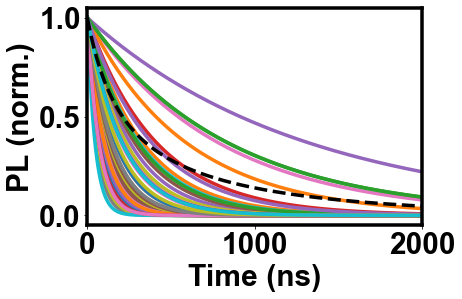

In [60]:
#plot of all exponetial decay for each k1 and average curve
plt.plot(t*1e9, pl_skew/np.max(pl_skew))
plt.plot(t*1e9, pl_skew_avg/np.max(pl_skew_avg),'k--', label="Average")
plt.xlabel('Time (ns)', fontsize= 30, fontweight ='bold' )
plt.ylabel('PL (norm.)', fontsize= 30, fontweight ='bold')
plt.xlim(0,2000)

In [62]:
stretched_exp_skew = stretch_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau_c (ns) = "+str(stretched_exp_skew[0]*1e9))
print("Beta = "+str(stretched_exp_skew[1]))
print("avg. tau (ns) = "+str(stretched_exp_skew[3]*1e9))

tau_c (ns) = 318.02416824347426
Beta = 0.6289234045698915
avg. tau (ns) = 451.2701596037545


In [66]:
double_exp_skew = double_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(double_exp_skew[0]*1e9))
print("a1 = "+str(double_exp_skew[1]))
print("tau2 (ns) = "+str(double_exp_skew[2]*1e9))
print("a2 = "+str(double_exp_skew[3]))
print("avg. tau (ns) = "+str(double_exp_skew[4]*1e9))

tau1 (ns) = 225.63483148133875
a1 = 0.5977146207828509
tau2 (ns) = 1026.8883965010261
a2 = 0.3424888692594013
avg. tau (ns) = 517.5082720503848


In [67]:
single_exp_skew = single_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau (ns) = "+str(single_exp_skew[0]*1e9))
print("a = "+str(single_exp_skew[1]))
print("avg. tau (ns) = "+str(single_exp_skew[2]*1e9))

tau (ns) = 793.1754992053026
a = 0.6264382241211829
avg. tau (ns) = 793.1754992053026


(0.04, 1)

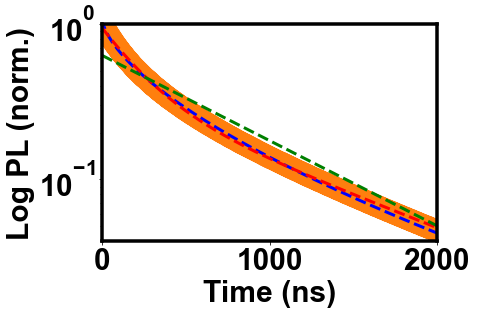

In [68]:
# plot average curve and multiple exponential fitting curves
plt.plot(t*1e9, pl_skew_avg/np.max(pl_skew_avg),'C1o', alpha=0.7,label="Average curve")
plt.plot(t*1e9, stretched_exp_skew[4], 'b--', lw = 3, label="Stretched exp. fit")
plt.plot(t*1e9, double_exp_skew[5], 'r--', lw = 3, label="Double exp. fit")
#plt.plot(t*1e9, triple_exp_skew[7], 'c--', lw = 3, label="triple exp fit")
plt.plot(t*1e9, single_exp_skew[3], 'g--', lw = 3, label="Single exp. fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize= 30, fontweight ='bold')
plt.ylabel("Log PL (norm.)", fontsize= 30, fontweight ='bold')
#plt.legend(fontsize=22)
plt.xlim(0, 2000)
plt.ylim(0.04, 1)

In [69]:
#Mathematical deriation of lifetime from average curve knowing at $\tau$ : $I = \frac{I_0}{e}$

#photoluminescence maximum divided by e
PL_e_skew = np.max(pl_skew, axis=0)/np.e
PL_e_skew.size

# index of PL data calculated considering each array inside the array of pl singularly
time_skew_PL_e = np.array([])
for ix, i in enumerate(PL_e_skew):
    b = find_idx(pl_skew[ix, :], i)
    time_skew_PL_e = np.append(time_skew_PL_e, b)
time_skew_PL_e

# array of lifetime at which PL=PL0/e
lifetime_skew = np.array([])
for i in time_skew_PL_e:
    lifetime_skew = np.append(lifetime_skew, t[int(i)]) 
lifetime_skew*1e9

# index of LLI PL data calculated considering each array inside the array of pl singularly
time_skew_PL_e = np.array([])
for ix, i in enumerate(PL_e_skew):
    b = find_idx(pl_skew[:, ix], i)
    time_skew_PL_e = np.append(time_skew_PL_e, b)
time_skew_PL_e

# array of lifetime at which PL=PL0/e
lifetime_skew = np.array([])
for i in time_skew_PL_e:
    lifetime_skew = np.append(lifetime_skew, t[int(i)]) 
lifetime_skew*1e9


lifetime_skew_avg = np.average(lifetime_skew, weights= skew_sum, axis=-1)
lifetime_skew_avg*1e9

486.6349709941368

(0.0, 1100.0)

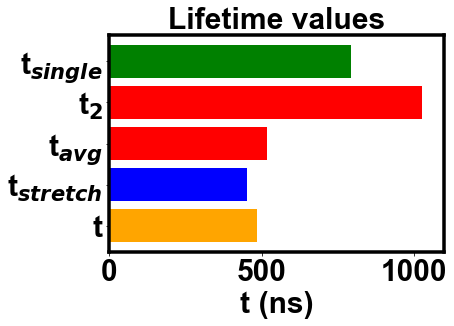

In [70]:
#plot of different tau values, from mathematical calculation (reference) and fitting functions
plt.figure()
plt.title("Lifetime values", fontsize=30, fontweight="bold")
plt.barh("t", lifetime_skew_avg*1e9, color='orange')
plt.barh("t$_{stretch}$", stretched_exp_skew[3]*1e9, color = 'blue')
plt.barh("t$_{avg}$", double_exp_skew[4]*1e9, color= 'red')
plt.barh("t$_{2}$", double_exp_skew[2]*1e9, color='red')
plt.barh("t$_{single}$", single_exp_skew[2]*1e9, color= 'green')
plt.xlabel("t (ns)", fontsize =30 , fontweight='bold')
plt.xlim(0, 1100)

SRV1=0 theoretical value = 77.30462820862698 cm/s
SRV1=SRV2 theoretical value = 38.61198981982529 cm/s
SRV1=0 from stretched exp fitting = 83.76489576856181 cm/s
SRV1=SRV2 from stretched exp fitting = 41.83510639440036 cm/s
SRV1=0 from tau 2 of biexp fitting = 33.97340368853494 cm/s
SRV1=SRV2 from tau 2 of biexp fitting = 16.978909146455997 cm/s
SRV1=0 from tau avg biexp fitting = 72.3877135439305 cm/s
SRV1=SRV2 from tau avg biexp fitting = 36.15849661244798 cm/s


Text(0.5, 0, 'SRV (cm/s)')

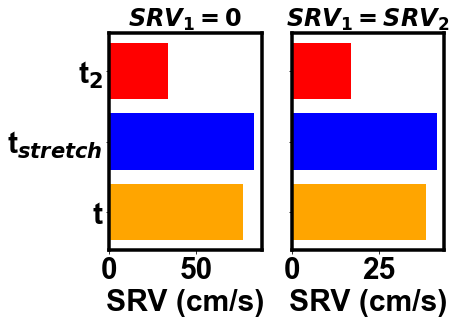

In [71]:
surf_lifetime_avg = calculate_surface_lifetime(lifetime_skew_avg*1e9)
SRV_avg = calculate_srv (surf_lifetime_avg)
print("SRV1=0 theoretical value = " +str(SRV_avg[0]) +' cm/s')
print("SRV1=SRV2 theoretical value = " +str(SRV_avg[1]) +' cm/s' )

surf_lifetime_stretch = calculate_surface_lifetime(stretched_exp_skew[3]*1e9)
SRV_avg_stretch = calculate_srv (surf_lifetime_stretch)
print("SRV1=0 from stretched exp fitting = " +str(SRV_avg_stretch[0]) +' cm/s')
print("SRV1=SRV2 from stretched exp fitting = " +str(SRV_avg_stretch[1]) +' cm/s' )

surf_lifetime_tau_2 = calculate_surface_lifetime(double_exp_skew[2]*1e9)
SRV_avg_tau2 = calculate_srv (surf_lifetime_tau_2)
print("SRV1=0 from tau 2 of biexp fitting = " +str(SRV_avg_tau2[0]) +' cm/s')
print("SRV1=SRV2 from tau 2 of biexp fitting = " +str(SRV_avg_tau2[1]) +' cm/s' )

surf_lifetime_bi = calculate_surface_lifetime(double_exp_skew[4]*1e9)
SRV_avg_bi = calculate_srv (surf_lifetime_bi)
print("SRV1=0 from tau avg biexp fitting = " +str(SRV_avg_bi[0]) +' cm/s')
print("SRV1=SRV2 from tau avg biexp fitting = " +str(SRV_avg_bi[1]) +' cm/s' )

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.barh("t", SRV_avg[0], color='orange')
ax1.barh("Stretched Exp", SRV_avg_stretch[0], color='blue')
#ax1.barh("$Tau_{avg}$", SRV_avg_bi[0], color='red')
ax1.barh("$Tau_{2}$", SRV_avg_tau2[0], color='red')
ax1.set_title("$SRV_{1} = 0$")
ax1.set_xlabel("SRV (cm/s)", fontsize= 30, fontweight ='bold')

ax2.barh("t",SRV_avg[1], color='orange')
ax2.barh("t$_{stretch}$", SRV_avg_stretch[1], color='blue')
#ax2.barh("t$_{avg}$", SRV_avg_bi[1], color='red')
ax2.barh("t$_{2}$",SRV_avg_tau2[1], color='red')
ax2.set_title("$SRV_{1} = SRV_{2}$")
ax2.set_xlabel("SRV (cm/s)", fontsize= 30, fontweight ='bold')

In [94]:
#parameters from Satub et al. and equations from Kircharzt et al.
def decay_HLI(t):
    n0 = np.power(10, 14)
    kr = 8.7e-10
    pr = 0.945
    tp = 871e-9
    tn = 511e-9
    decay = (n0*np.exp(-(t/(tp+tn))))/(1+n0*kr*(1-pr)*(tp+tn)*(1-(np.exp(-(t/(tp+tn))))))
    return decay

In [95]:
t = np.linspace(0,5000e-9)
nt = decay_HLI(t)

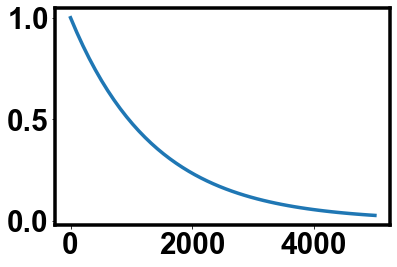

In [96]:
plt.plot(t*1e9, nt/np.max(nt))

In [98]:
stretched_decay_HL = stretch_exp_fit(nt/np.max(nt), t)
print("tau_c (ns) = "+str(stretched_decay_HL[0]*1e9))
print("Beta = "+str(stretched_decay_HL[1]))
print("avg. tau (ns) = "+str(stretched_decay_HL[3]*1e9))

tau_c (ns) = 1376.0792809359787
Beta = 0.9980719658025533
avg. tau (ns) = 1377.205264365105


In [99]:
double_decay_HL = double_exp_fit(nt/np.max(nt), t)
print("tau1 (ns) = "+str(double_decay_HL[0]*1e9))
print("a1 = "+str(double_decay_HL[1]))
print("tau2 (ns) = "+str(double_decay_HL[2]*1e9))
print("a2 = "+str(double_decay_HL[3]))
print("avg. tau (ns) = "+str(double_decay_HL[4]*1e9))

tau1 (ns) = 687.8668554455363
a1 = 0.006539355207411224
tau2 (ns) = 1381.9900683079559
a2 = 0.9934602028188919
avg. tau (ns) = 1377.4509480551671


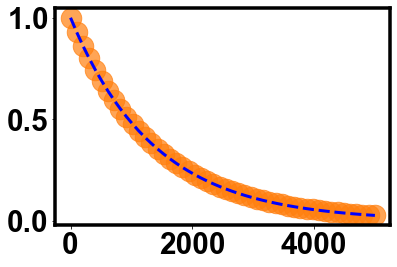

In [100]:
plt.plot(t*1e9, nt/np.max(nt),'C1o', alpha=0.7,label="Decay")
plt.plot(t*1e9, stretched_decay_HL[4], 'b--', lw = 3, label="stretched exp fit")
#plt.plot(t*1e9, double_decay_HL[5], 'r--', lw = 3, label="double exp fit")

In [101]:
def decay_LLI(t):
    n0 = np.power(10, 14)
    kr = 8.7e-10
    pr = 0.945
    tn = 511e-9
    p0 = 1e18
    decay = (n0*np.exp(-t/((1/(kr*(1-pr)*p0))+tn)))
    return decay

In [102]:
nt_LLI = decay_LLI(t)

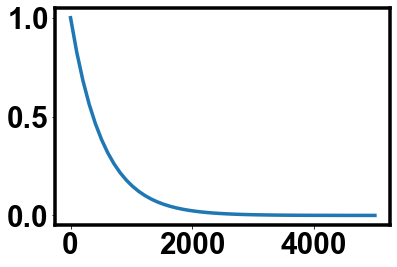

In [103]:
plt.plot(t*1e9, nt_LLI/np.max(nt_LLI))

In [104]:
stretched_decay_LL = stretch_exp_fit(nt_LLI/np.max(nt_LLI), t)
print("tau_c (ns) = "+str(stretched_decay_LL[0]*1e9))
print("Beta = "+str(stretched_decay_LL[1]))
print("avg. tau (ns) = "+str(stretched_decay_LL[3]*1e9))

tau_c (ns) = 531.8986415882962
Beta = 0.9999999999999993
avg. tau (ns) = 531.8986415882963


In [105]:
double_decay_LL = double_exp_fit(nt_LLI/np.max(nt_LLI), t)
print("tau1 (ns) = "+str(double_decay_LL[0]*1e9))
print("a1 = "+str(double_decay_LL[1]))
print("tau2 (ns) = "+str(double_decay_LL[2]*1e9))
print("a2 = "+str(double_decay_LL[3]))
print("avg. tau (ns) = "+str(double_decay_LL[4]*1e9))

tau1 (ns) = 531.8986416515619
a1 = 0.9340129136895636
tau2 (ns) = 531.8986406928103
a2 = 0.06598708631043637
avg. tau (ns) = 531.8986415882966


In [106]:
def model_HLI(n, t):
    kr = 8.7e-10
    pr = 0.945
    tp = 871e-9
    tn = 511e-9
    dndt = -(kr*(1-pr)*(n**2) + n/(tp+tn))
    return dndt

In [117]:
n0 = np.power(10, 14)
t = np.linspace(0,5000e-9)
y_HLI = odeint(model_HLI, n0, t)

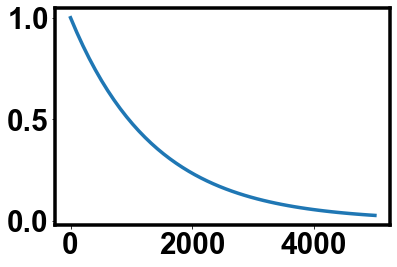

In [118]:
plt.plot(t*1e9, y_HLI/np.max(y_HLI))

In [121]:
stretched_decay = stretch_exp_fit(y_HLI/np.max(y_HLI), t)
print("tau_c (ns) = "+str(stretched_decay[0]*1e9))
print("Beta = "+str(stretched_decay[1]))
print("avg. tau (ns) = "+str(stretched_decay[3]*1e9))

tau_c (ns) = 10000.0
Beta = 0.06851438221202866
avg. tau (ns) = 4337734452638421.0


In [123]:
double_decay = double_exp_fit(y_HLI/np.max(y_HLI), t)
print("tau1 (ns) = "+str(double_decay[0]*1e9))
print("a1 = "+str(double_decay[1]))
print("tau2 (ns) = "+str(double_decay[2]*1e9))
print("a2 = "+str(double_decay[3]))
print("avg. tau (ns) = "+str(double_decay[4]*1e9))

tau1 (ns) = 28.288918855170277
a1 = 0.011989406072991537
tau2 (ns) = 9973.111526017725
a2 = 0.48638592961416427
avg. tau (ns) = 9733.869115683068


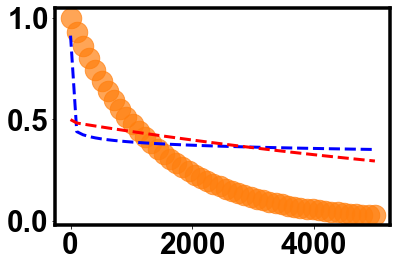

In [124]:
plt.plot(t*1e9, y_HLI/np.max(y_HLI),'C1o', alpha=0.7,label="Decay")
plt.plot(t*1e9, stretched_decay[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_decay[5], 'r--', lw = 3, label="double exp fit")

In [125]:
def model_LLI(n, t):
    kr = 8.7e-10
    pr = 0.945
    p0 = 1e18
    tn = 503e-9
    dndt = -(kr*(1-pr)*n*p0 + n/(tn))
    return dndt

In [126]:
n0 = np.power(10, 14)
t = np.linspace(0,2000e-9)
y_LLI = odeint(model_LLI, n0, t)

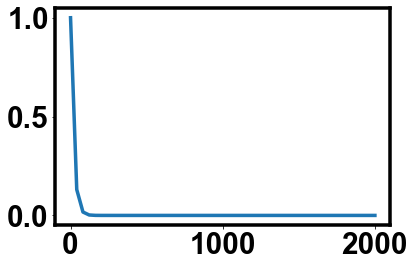

In [127]:
plt.plot(t*1e9, y_LLI/np.max(y_LLI))

In [129]:
stretched_decay = stretch_exp_fit(y_LLI/np.max(y_LLI), t)
print("tau_c (ns) = "+str(stretched_decay[0]*1e9))
print("Beta = "+str(stretched_decay[1]))
print("avg. tau (ns) = "+str(stretched_decay[3]*1e9))

tau_c (ns) = 10000.0
Beta = 0.9454189471110384
avg. tau (ns) = 10257.974273784635


In [131]:
double_decay = double_exp_fit(y_LLI/np.max(y_LLI), t)
print("tau1 (ns) = "+str(double_decay[0]*1e9))
print("a1 = "+str(double_decay[1]))
print("tau2 (ns) = "+str(double_decay[2]*1e9))
print("a2 = "+str(double_decay[3]))
print("avg. tau (ns) = "+str(double_decay[4]*1e9))

tau1 (ns) = 88.83241802842501
a1 = 0.003908755531409125
tau2 (ns) = 8669.303460058753
a2 = 0.1585463896699798
avg. tau (ns) = 8462.85285114726


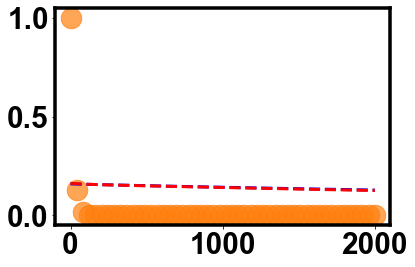

In [133]:
plt.plot(t*1e9, y_LLI/np.max(y_LLI),'C1o', alpha=0.7,label="Decay")
plt.plot(t*1e9, stretched_decay[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_decay[5], 'r--', lw = 3, label="double exp fit")

In [325]:
np.random.normal(3, 2.5, size=(2, 4))

array([[ 5.24496468,  4.33107165, -0.03727029,  4.70459293],
       [ 3.67340497, -0.33473994,  7.56783035,  6.06425406]])

In [162]:
gauss = norm.rvs(loc = 1e6, scale=1e5, size=50)

In [163]:
g = np.absolute(gauss)

Text(0, 0.5, 'Counts')

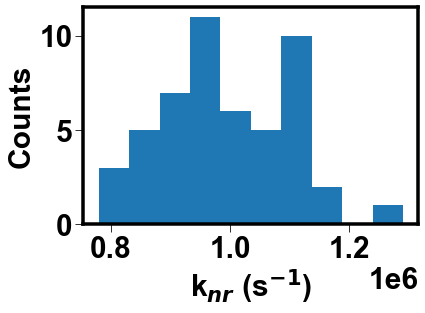

In [164]:
plt.figure()
plt.tick_params(length=8)
plt.hist(g)
plt.xlabel("k$_{nr}$ (s$^{-1}$)", fontsize =30, fontweight ='bold')
#plt.xscale("log")
plt.ylabel('Counts', fontsize =30, fontweight ='bold')

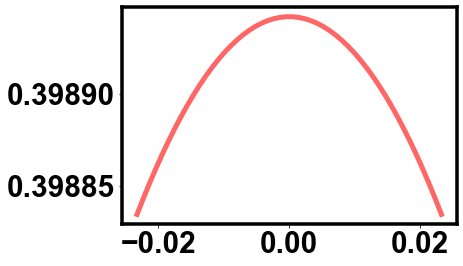

In [179]:
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 50)
plt.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6, label='gauss pdf')

In [124]:
x/2

array([-1.16317394, -1.11569745, -1.06822096, -1.02074448, -0.97326799,
       -0.9257915 , -0.87831501, -0.83083853, -0.78336204, -0.73588555,
       -0.68840906, -0.64093258, -0.59345609, -0.5459796 , -0.49850312,
       -0.45102663, -0.40355014, -0.35607365, -0.30859717, -0.26112068,
       -0.21364419, -0.16616771, -0.11869122, -0.07121473, -0.02373824,
        0.02373824,  0.07121473,  0.11869122,  0.16616771,  0.21364419,
        0.26112068,  0.30859717,  0.35607365,  0.40355014,  0.45102663,
        0.49850312,  0.5459796 ,  0.59345609,  0.64093258,  0.68840906,
        0.73588555,  0.78336204,  0.83083853,  0.87831501,  0.9257915 ,
        0.97326799,  1.02074448,  1.06822096,  1.11569745,  1.16317394])

Text(0, 0.5, 'Counts')

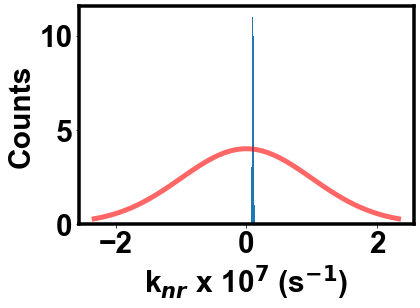

In [174]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, norm.pdf(x)*10, 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.hist(g*1e-7)
plt.xlabel("k$_{nr}$ x 10$^{7}$ (s$^{-1}$)", fontsize =30, fontweight ='bold')
#plt.xscale("log")
plt.ylabel('Counts', fontsize =30, fontweight ='bold')

In [252]:
mu, sigma = 1e7, 1e6 
g = np.random.normal(mu, sigma, 50)

In [253]:
gauss = np.absolute(g)

In [221]:
g = np.array([1162538.11120136, 1100248.51582346,  989198.17567472,
        963220.28320062, 1086897.37963656,  948562.72064572,
       1012303.24712403,  902829.35362135, 1172922.83639941,
       1081967.38713936, 1031853.19605668, 1026680.69512169,
        988436.55180917, 1086440.88178348, 1166033.47463431,
        837373.4667915 ,  942776.33237627, 1037456.54978698,
        843141.34609628, 1036929.49212494,  796380.58006845,
        950217.49251142,  856269.99628191, 1166954.27757942,
        918682.64081106,  896716.81210554,  973043.75515559,
       1019665.36465928, 1152591.64730602,  857929.36551594,
       1075291.50630848, 1047094.30175979, 1055637.05344467,
        974062.32564988, 1111878.81979244,  858821.56307453,
       1117734.68891405, 1051375.7138737 ,  984865.44502697,
       1162044.31533989,  965252.45094839,  760501.00168003,
       1190366.30824852,  993950.00983541, 1131173.19823083,
       1084101.28843542, 1126708.08788173, 1071968.55337884,
       1010809.69461928, 1258786.55423974])

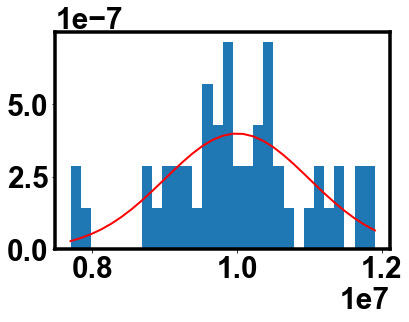

In [254]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(gauss, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
#plt.xlim(0.7e6, 1.3e6)
plt.show()

In [255]:
#creation of LLI PL decay curves and average decay curve

# photoluminescence database from k1 from 1e5 to 1e7 and time from 0 to 1000ns
pl_LLI = photoluminescence_LLI(k1=gauss, t = np.linspace(0,5000, 5000)*1e-9)
pl_LLI

#weighted sum of photoluminescence data
pl_LLI_sum = pl_LLI.sum(axis=0)
pl_LLI_sum

#weighted average og the photoluminescence data
pl_LLI_avg = np.average(pl_LLI, weights=pl_LLI_sum, axis=-1)
pl_LLI_avg

array([2.00000000e+22, 1.98022042e+22, 1.96063886e+22, ...,
       1.87972335e+04, 1.86514899e+04, 1.85068766e+04])

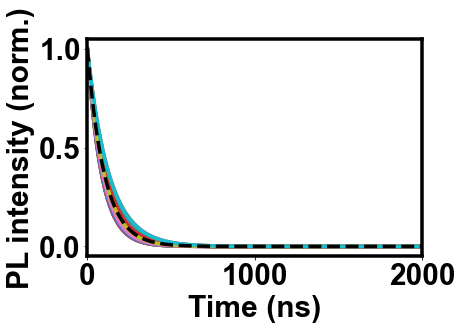

In [256]:
#plot of exponential decay of photoluminescence
plt.plot(t*1e9, pl_LLI/np.max(pl_LLI))
plt.plot(t*1e9, pl_LLI_avg/np.max(pl_LLI_avg),'k--', label="Average")
plt.xlabel('Time (ns)', fontsize =30, fontweight ='bold')
plt.ylabel('PL intensity (norm.)', fontsize= 30, fontweight ='bold')
plt.xlim(0, 2000)
plt.show()

In [258]:
#streched exponential fitting of the average PL exponential decay
stretched_exp = stretch_exp_fit(pl_LLI_avg/np.max(pl_LLI_avg), t)
print("tau_c (ns) = "+str(stretched_exp[0]*1e9))
print("Beta = "+str(stretched_exp[1]))
print("avg. tau (ns) = "+str(stretched_exp[3]*1e9))

tau_c (ns) = 100.08440191577958
Beta = 0.9802743219509474
avg. tau (ns) = 100.95263043795605


In [260]:
#double exponential fitting of the average PL exponential decay
double_exp = double_exp_fit(pl_LLI_avg/np.max(pl_LLI_avg), t)
print("tau1 (ns) = "+str(double_exp[0]*1e9))
print("a1 = "+str(double_exp[1]))
print("tau2 (ns) = "+str(double_exp[2]*1e9))
print("a2 = "+str(double_exp[3]))
print("avg. tau (ns) = "+str(double_exp[4]*1e9))

tau1 (ns) = 94.48074925643986
a1 = 0.6855389287232175
tau2 (ns) = 117.89902599173871
a2 = 0.3141381880615736
avg. tau (ns) = 101.83970035938384


In [34]:
#triple exponential fitting of the average PL exponential decay
#triple_exp = triple_exp_fit(pl_LLI_avg/np.max(pl_LLI_avg), t)
#print("tau1 (ns) = "+str(triple_exp[0]*1e9))
#print("a1 = "+str(triple_exp[1]))
#print("tau2 (ns) = "+str(triple_exp[2]*1e9))
#print("a2 = "+str(triple_exp[3]))
#print("tau3 (ns) = "+str(triple_exp[4]*1e9))
#print("a3 (ns) = "+str(triple_exp[5]))
#print("avg. tau (ns) = "+str(triple_exp[6]*1e9))

In [262]:
#single exponential fitting of the average PL exponential decay
single_exp = single_exp_fit(pl_LLI_avg/np.max(pl_LLI_avg), t)
print("tau (ns) = "+str(single_exp[0]*1e9))
print("a = "+str(single_exp[1]))
print("avg. tau (ns) = "+str(single_exp[2]*1e9))

tau (ns) = 103.02372928788077
a = 0.9882270197599212
avg. tau (ns) = 103.02372928788077


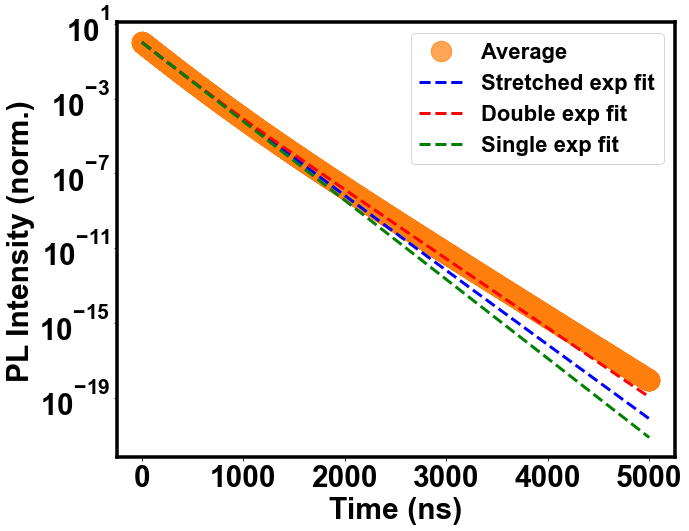

In [264]:
# plot fitting functions of the average PL exponential decay
plt.figure(figsize=(10,8))
plt.plot(t*1e9, pl_LLI_avg/np.max(pl_LLI_avg),'C1o', alpha=0.7,label="Average")
plt.plot(t*1e9, stretched_exp[4], 'b--', lw = 3, label="Stretched exp fit")
plt.plot(t*1e9, double_exp[5], 'r--', lw = 3, label="Double exp fit")
#plt.plot(t*1e9, triple_exp[7], 'c--', lw = 3, label="triple exp fit")
plt.plot(t*1e9, single_exp[3], 'g--', lw = 3, label="Single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30, fontweight ='bold')
plt.ylabel("PL Intensity (norm.)", fontsize=30, fontweight ='bold')
plt.legend(fontsize=22)